# **Austo Motor Company Case Study**

### **Context:**
*Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.*
*Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.*


### **Objective:**
*They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business*

### **Data Description:**

•	***Age***: *The age of the individual in years.*

•	***Gender***: *The gender of the individual, categorized as male or female.*

•	***Profession***: *The occupation or profession of the individual.*

•	***Marital_status***: *The marital status of the individual, such as married &, single*

•	***Education***: *The educational qualification of the individual Graduate and Post Graduate*

•	***No_of_Dependents***: *The number of dependents (e.g., children, elderly parents) that the individual supports financially.*

•	***Personal_loan***: *A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"*

• ***House_loan***: *A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"*

•	***Partner_working***: *A binary variable indicating whether the individual's partner is employed "Yes" or "No"*

•	***Salary***: *The individual's salary or income.*

•	***Partner_salary***: *The salary or income of the individual's partner, if applicable.*

•	***Total_salary***: *The total combined salary of the individual and their partner (if applicable).*

•	***Price***: *The price of a product or service.*

•	***Make***: *The type of automobile.*


### **Key Questions:**
Explore the data to answer the following key questions:

1.   *Do men tend to prefer SUVs more compared to women?*
2.   *What is the likelihood of a salaried person buying a Sedan?*
3.   *What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?*
4.   *How does the the amount spent on purchasing automobiles vary by gender?*
5.   *How much money was spent on purchasing automobiles by individuals who took a personal loan?*
6.   *How does having a working partner influence the purchase of higher-priced cars?*



## **Importing the necessary libraries and loading the dataset**

In [3]:

import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/austo_automobile .csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Overview**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**The initial steps to get an overview of any dataset is to:**

*- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not*

*- get information about the number of rows and columns in the dataset*

*- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.*

*- check the statistical summary of the dataset to get an overview of the numerical columns of the data*

In [5]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [6]:
data.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [7]:
data.shape

(1581, 14)

***The dataset has 1581 rows and 14 coloumns***






In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


***The data type of the dataset has 8 object, 5 int and 1 float data type***

In [9]:
data.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0




* **The price of Car ranges from 18000 to 70000; however average price of car is 35598**
* **The average age of customers purchasing the car is 32 years; however, the minimum age of customer is 22 and the maximum is 54**
* **There is a big difference in the min and maximum age group of customerss**
* **There is a huge difference in the total combined salary of the individual and their partner**
* **There is a huge difference in the average Total_Salary adn the maximum salary**





# **Sanity Check**

In [11]:
data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64




* **The variables Gender and Partner_salary have 53 and 106 missing values in them**

* **There are no missing values in other variables**



In [12]:
data.Gender.value_counts(normalize=True, dropna= False)*100

Gender
Male      75.838077
Female    20.683112
NaN        3.352309
Femal      0.063251
Femle      0.063251
Name: proportion, dtype: float64

**We see there are 75.9 % Males, 20.6% Females and 3.3% not a number**

In [13]:
data.Gender.unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [14]:
data['Gender'].replace(['Femal', 'Femle'], 'Female', inplace=True)
data.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

**After checking the uniqueness of the data we find that there are 5 entries in Gender.**

**1. Male**

**2. Female**

**3. Femal**

**4. nan**

**5. Femle**

**The entries 'Femal' and 'Femle' are misspleed entries of Female**

**Changed the misspelled 'Femal' and 'Femle' to 'Female**.

**Now the Gender has only Male/Female or nan values**

**Imputing the NAN values in Gender coloum with Mode technique**

In [15]:
mode_value = data['Gender'].mode()[0]
data['Gender'].fillna(mode_value, inplace=True)
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [16]:
data.Gender.value_counts(normalize=True, dropna= False)*100

Gender
Male      79.190386
Female    20.809614
Name: proportion, dtype: float64

**Now, after imputation we have 79.19% Males and 20.80% Females**

In [17]:
data.Partner_salary.value_counts(normalize=True, dropna= False)*100

Partner_salary
0.0        39.405440
NaN         6.704617
40500.0     1.834282
40200.0     1.707780
40100.0     1.581278
             ...    
45800.0     0.063251
27300.0     0.063251
22900.0     0.063251
23100.0     0.063251
35000.0     0.063251
Name: proportion, Length: 150, dtype: float64

**We see that there are 39.4% of 0 entries, which means close to 39% of partners are not working**

**We also have 6.7%  missing values in the Partner Salary**

In [18]:
New_Partner_salary = data ['Total_salary'] - data ['Salary']
data['Partner_salary'] = New_Partner_salary

**Since the Total_Salary = Salary + Partner_Salary**

**So Partner_Salary = Total_Salary-Salary**



In [19]:
data.Partner_salary.unique()

array([70700, 70300, 60700, 60200, 60500, 50800, 40400,     0, 70600,
       60600, 60300, 45500, 40200, 40700,   600,   700, 27800, 70000,
       40100, 40900, 27000, 40500, 80100, 50400, 80400, 60900,   400,
       60100, 70200, 30000, 40300, 40800, 70800,   900, 45000, 40600,
       50700, 80500, 27700, 35800, 26600, 60000, 27900, 60800, 40000,
       70100, 38100, 38200, 30200, 38500, 50900, 35100, 38700, 38300,
       38900, 23200, 24700, 30800, 28100, 70500, 38400, 38000, 23100,
       30100, 25700, 70400,   200, 30900, 26100, 45700, 28200, 70900,
       38800, 45200, 26800, 35300, 60400, 30300, 25800,   800, 38600,
       24500, 30700, 28500, 24900, 35900, 30500, 28900, 27200, 45900,
       25300, 35600, 25000, 25200, 26300, 35700, 23800, 32700, 30600,
       45600, 28000, 32600, 28600, 25100, 26700, 24200, 25900, 22100,
       25400, 28400, 28300, 25500, 24000, 32400, 28800, 32300, 32900,
       27600, 35500, 28700, 23500, 45400, 32800, 23700, 32500, 45800,
       27300, 22900,

In [20]:
data.loc[data.Partner_salary.isnull() == True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


**We were successfully able to impute the NAN values in Partner Salary using the formual ( Partner_Salary = Total_Salary-Salary )**

In [21]:
data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [22]:
data = pd.DataFrame(data)
duplicates = data[data.duplicated()]
if not duplicates.empty:
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


**Now our data has no missing values, no duplicates and all the NAN values have been treated(imputed)**

# **1. Univariate analysis**

#### *1.1 Countplot Graph & Analysis*

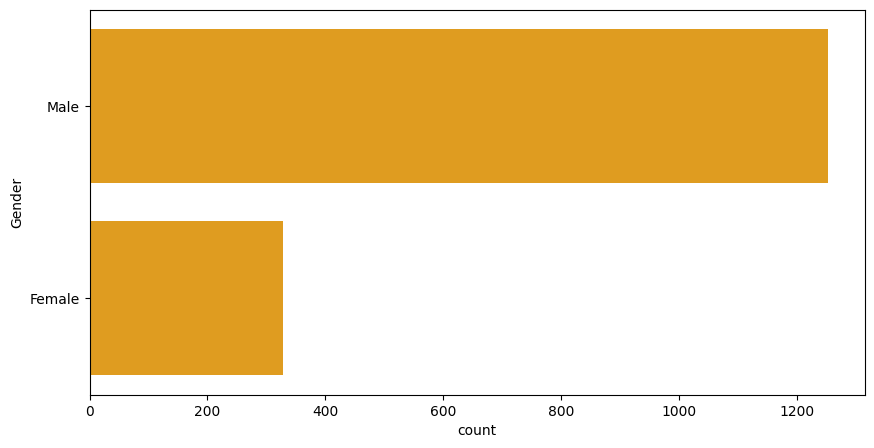

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data['Gender'],  color='orange')
plt.show()


***There are close to 1220 males, 350 Females***




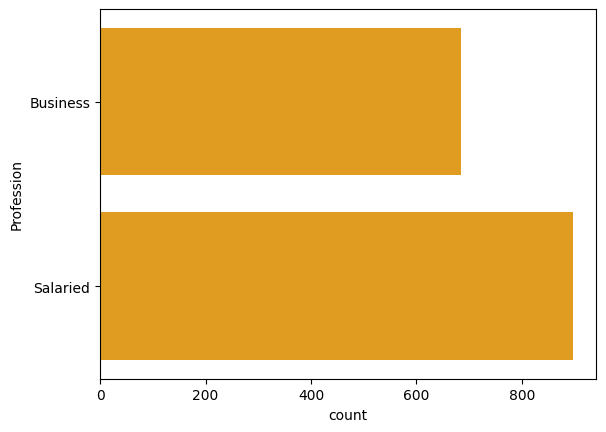

In [24]:
sns.countplot(data['Profession'], color='orange')
plt.show()

**There are close to 900 Salaried customers and close to 700 Business customers**

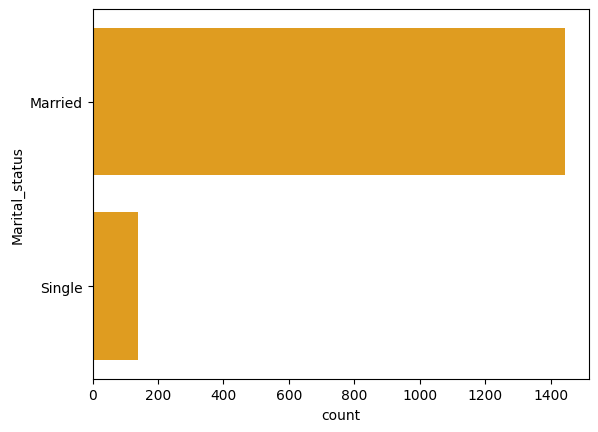

In [25]:
sns.countplot(data['Marital_status'],  color='orange')
plt.show()



  **There are 1400 Married customers and there are 150 Single Customers**


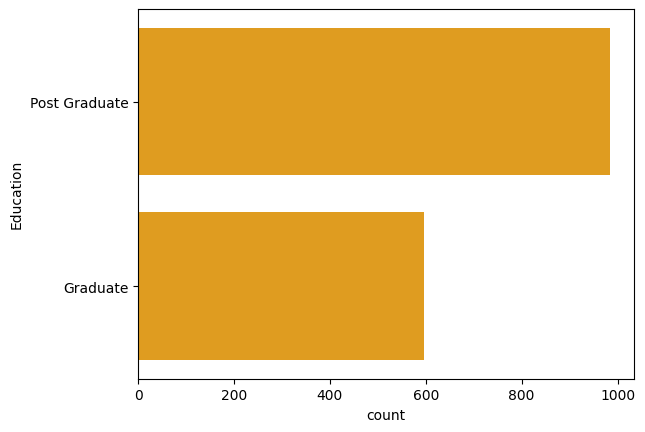

In [26]:
sns.countplot(data['Education'],  color='orange')
plt.show()

**There are around 980 Post Graduate customers and 600 Graduate customers**

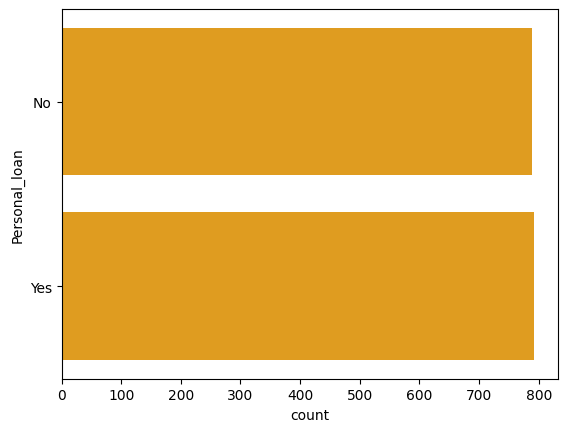

In [27]:
sns.countplot(data['Personal_loan'],  color='orange')
plt.show()


**People who have taken Personal loan is 50% and those who have not taken Personal loan is also 50%.**

**There are equal percentage of customers who have taken Personal loan and those who have not.**

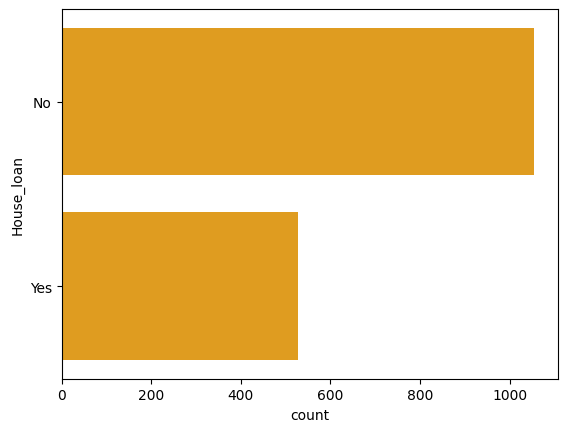

In [28]:
sns.countplot(data['House_loan'],  color='orange')
plt.show()

**According to the data, only around 520 people have taken House loan however, around 1050 people have not, which means people who have taken House loans have purchased around 50% less cars than person who have not taken house loan**

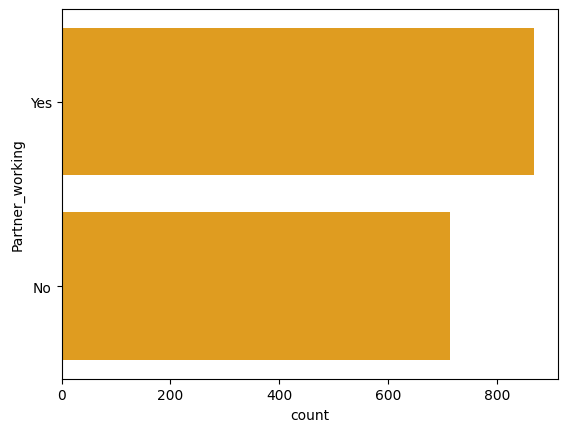

In [29]:
sns.countplot(data['Partner_working'], color='orange')
plt.show()

**There are around 840 customers whose partners are working and around 720 customers whose partner are not working**

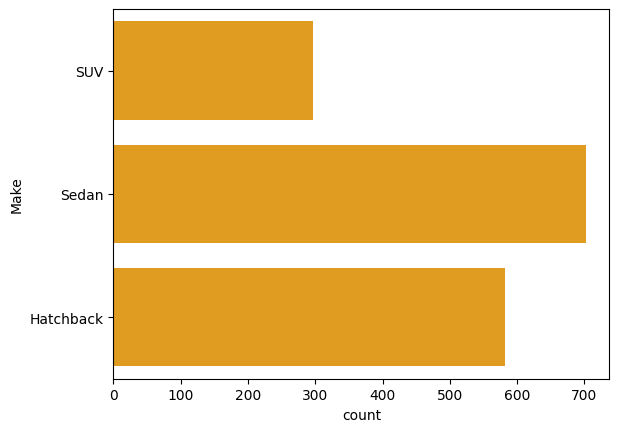

In [30]:
sns.countplot(data['Make'],  color='orange')
plt.show()

**Most cars made by Austo Automobile are in Sedan segment(700), followed by Hatchback(around 580) and SUV at last with a count of 300 cars.**

#### *1.2 Histogram Graph & Boxplot Analysis*

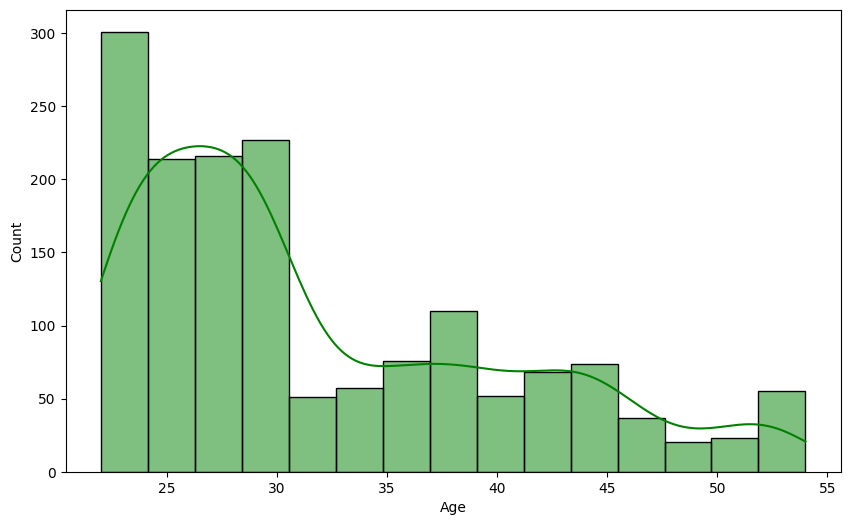

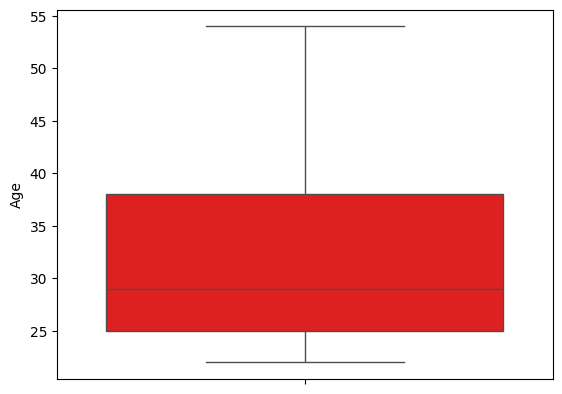

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], color='green', kde=True)
plt.show()
sns.boxplot(data['Age'], color='red')
plt.show()



*  **There are more people in Age Group 22-30.**
*   **Number of people are decreasing with increasing age**
*   **According to the data distribution, the count of people is declining with increasing Age**
*The data of Age is highly Right Skewed
*50% of people are less than 30 years
*The highest age of the customer is 53 years




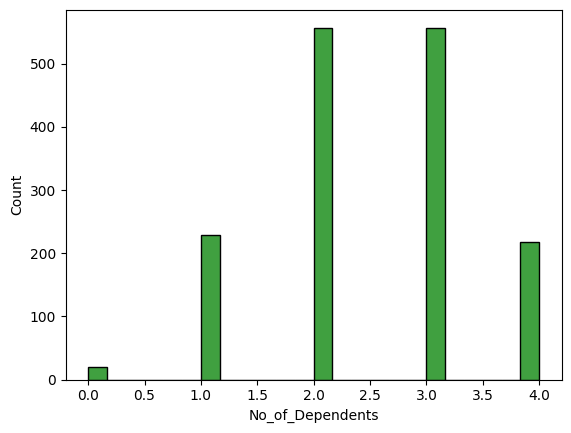

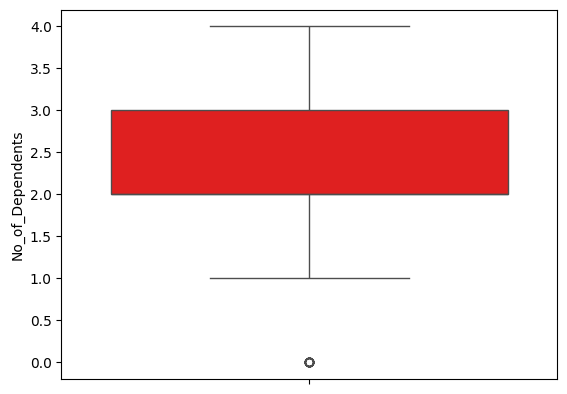

In [32]:
sns.histplot(data['No_of_Dependents'],  color='green')
plt.show()
sns.boxplot(data['No_of_Dependents'], vert = 'True', color='red')
plt.show()

*   **People with the least number of dependants, that is 0, are close to 20.**
*   **There are around 550 people with 2 dependants and 550 people with 3 dependants**

*   **However, there are around 220 people with 1 dependant and 220 people with 4 dependants**

Most people have 2-3 dependants.

There is an outlier but it can be ignored because there are almost few people, around 20. who have 0 dependant





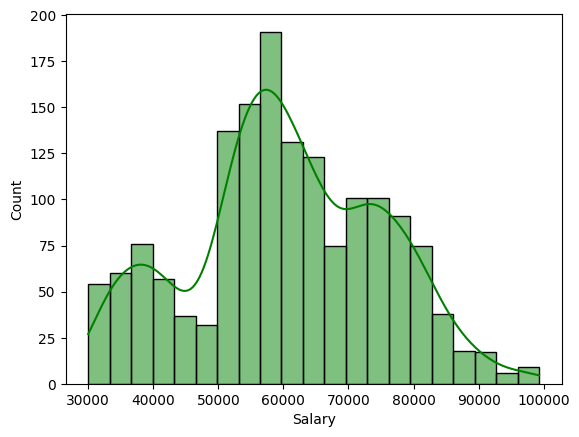

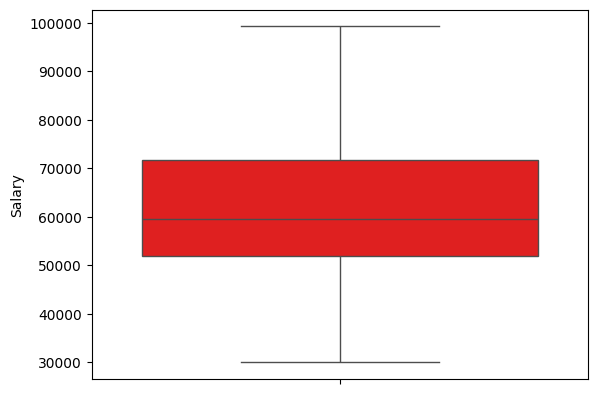

In [33]:
sns.histplot(data['Salary'], color='green', kde = True)
plt.show()
sns.boxplot(data['Salary'], color='red')
plt.show()

**Most people have a salary in the range of 560000-60000.**
**There are only a few people with salary in the range of 930000-960000**

The data of Salary is Right Skewed.

Almost half of the customers have salary less than 60000. The average salary of people is 60000


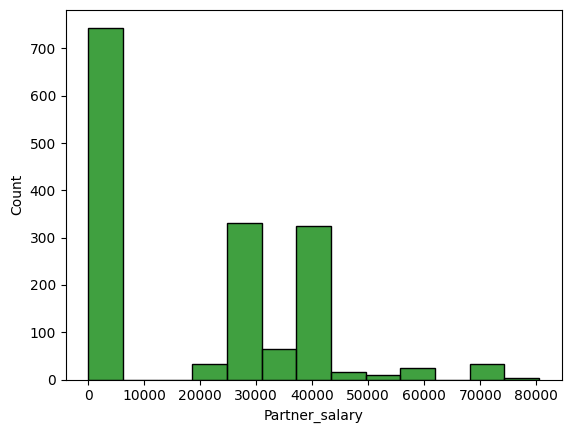

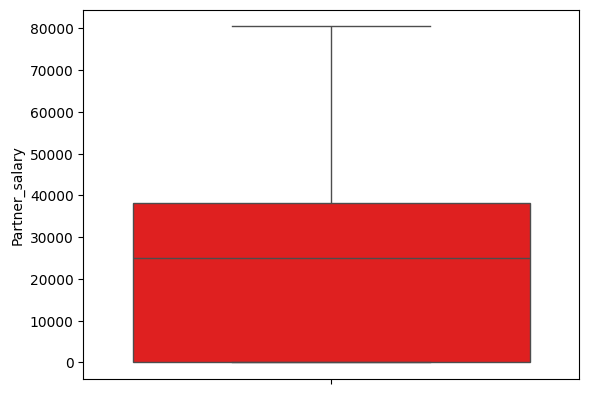

In [34]:
sns.histplot(data['Partner_salary'], color='green')
plt.show()
sns.boxplot(data['Partner_salary'], color='red')
plt.show()

**There are around 740 people whose partners are not working and hence they have 0 salary**

The Partner_Salary column is highly right-skewed.

50% of Partner_Salary is between 0-25000.


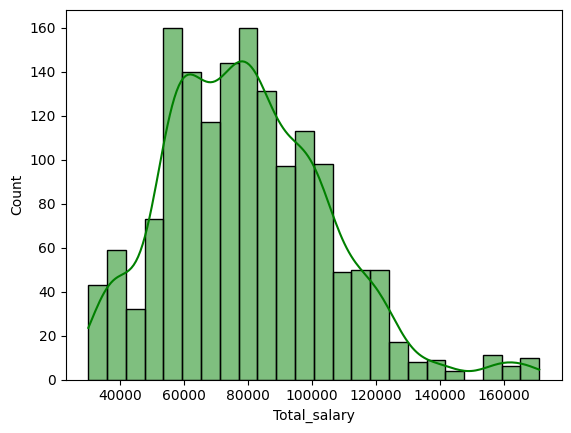

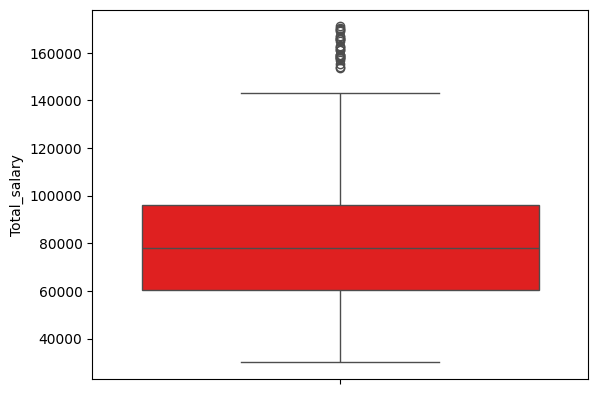

In [35]:
sns.histplot(data['Total_salary'],  color='green', kde = True)
plt.show()
sns.boxplot(data['Total_salary'], color='red')
plt.show()

**Most people have a Total salary in the range of 60000-100000**

**There are most people with a salary below 100000, but some people with a salary above 100000**


**The distribution or the count of people is declining with the increase in Total salary of customers**
Average Total Salary of people is 80000.

There are few outliers, which means there are few people who have who have

Total Salary over 140000

In [36]:
def outlier_treatment(data, Total_salary):
  Q1 = data[Total_salary].quantile(0.25)
  Q3 = data[Total_salary].quantile(0.75)
  IQR = Q3 - Q1
  Lower_Whisker = Q1 - 1.5 * IQR
  Upper_Whisker = Q3 + 1.5 * IQR
  data[Total_salary] = np.clip(data[Total_salary], Lower_Whisker, Upper_Whisker)
  return data

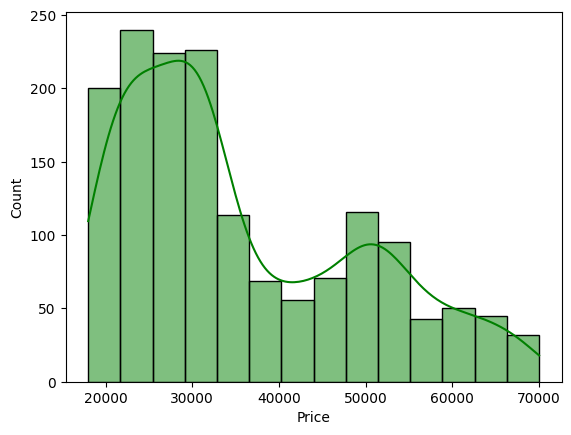

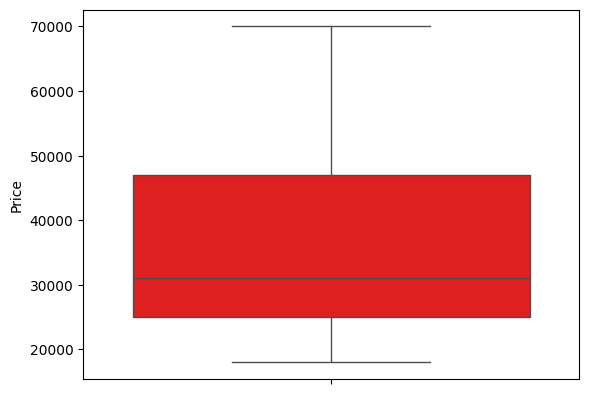

In [37]:
sns.histplot(data['Price'], kde = True, color='green')
plt.show()
sns.boxplot(data['Price'], color='red')
plt.show()

**Most cars(close to 250) are made  in the less Price range which is 20000-30000.**

**Less than 50 cars are made that have a price of 70000.**
Average price of cars is 30000.

Most people buy cars below 50000, however, there are few people, close to 50 who have purcahsed car in the price range 65000-70000

# **2. Bivariate Analysis**

#### *2.1 Countplot Graph & Analysis*

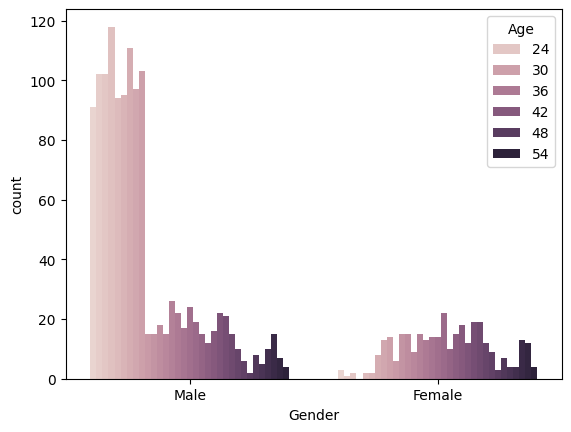

In [38]:
sns.countplot(x='Gender', hue='Age', data=data)
plt.show()

There are maximum male in the age group of 24-36.

Feamles are very less in the younger age group.

Most females are in the age group 36-42.

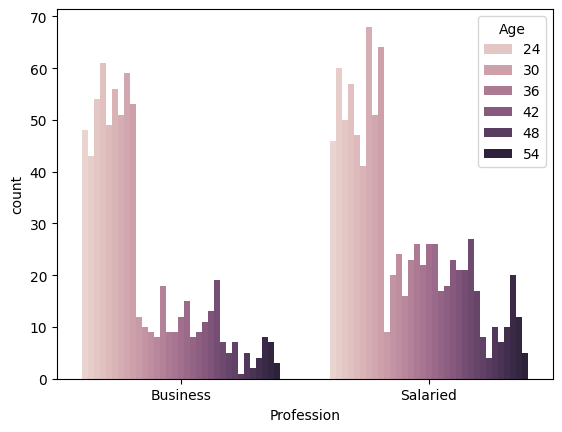

In [39]:
sns.countplot(x='Profession', hue='Age', data=data)
plt.show()

Most Business people are young  people who are in the age group of 24-30.

The distribution of Salaried people are more with respect to the salaried people.

More people in the age group of 36-48 are salaried.

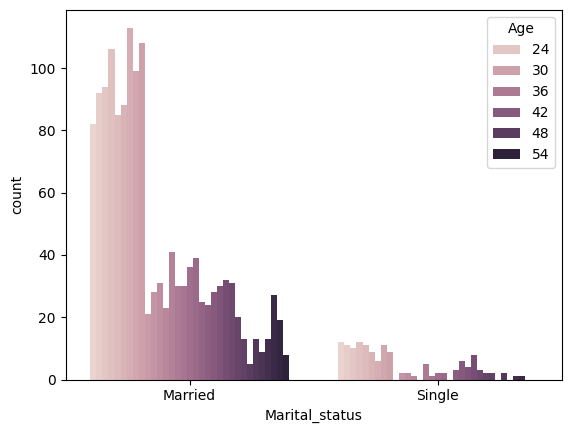

In [40]:
sns.countplot(x='Marital_status', hue='Age', data=data)
plt.show()

Highest number of married people are in the age group of 24-30.

There are very less single people and most of them are in the age group of 24-30

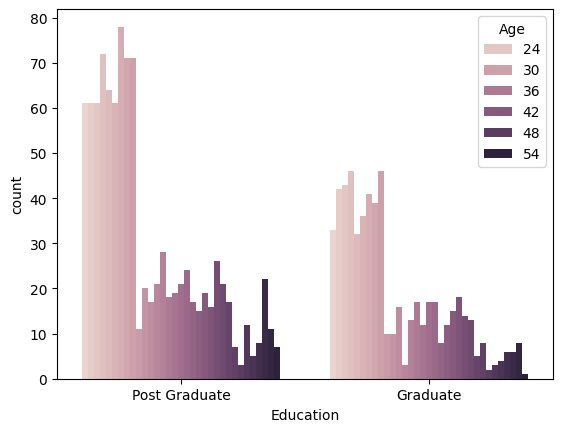

In [41]:
sns.countplot(x='Education', hue='Age', data=data)
plt.show()

The people with post-graduation are more in the age group of 24-30.

The people with only Graduation are around 40% less in number and most of Gradutaes are in the age group of 24-30.

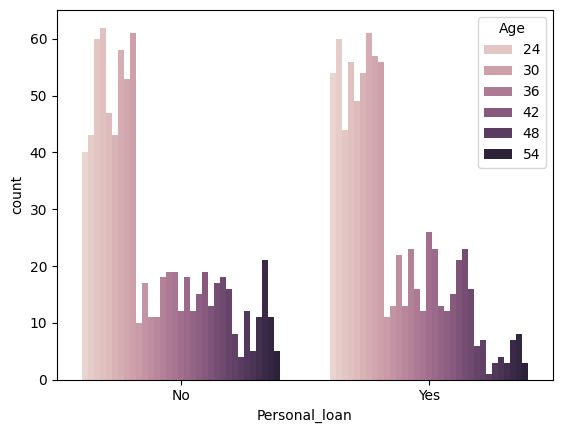

In [42]:
sns.countplot(x='Personal_loan', hue='Age', data=data)
plt.show()

The relationship between Personal loans and Count is almost same for the people who have taken Personal loan and for the ones who have not taken personal loan.

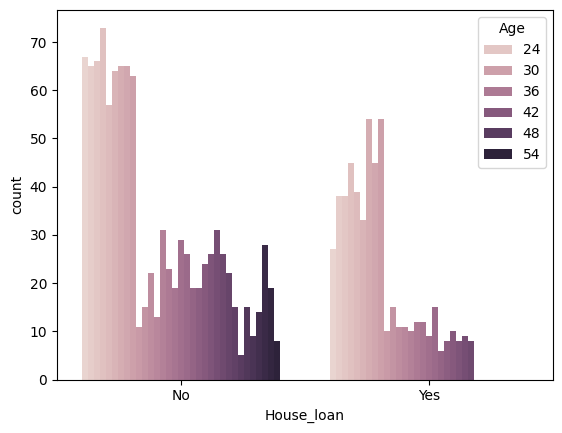

In [43]:
sns.countplot(x='House_loan', hue='Age', data=data)
plt.show()

More people are the ones who have not taken any House loan.
Most people who have not taken House loan and are in the age group of 24-30, around  60-70.

The person who have taken House loan and are in the age group of 24-30 are around 30-55.

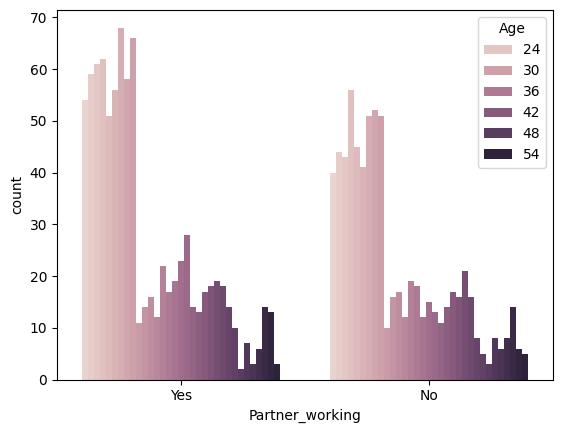

In [44]:
sns.countplot(x='Partner_working', hue='Age', data=data)
plt.show()

People in the age group of 24-30 whose partners are working are in the range of 50-70. However, people in the age group of 48-54 are less and are in the range of 0-15.

People in the age group of 24-30 whose partner are not working are in the range of 40-55, however, people in the age group of 48-54 are less and are in the range of 5-15.

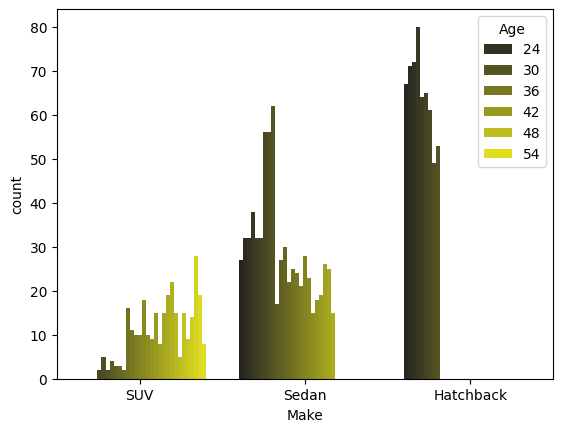

In [45]:
sns.countplot(x='Make', hue='Age', data=data, palette='dark:yellow')
plt.show()

Most SUV cars have been purcahsed by people of age group 42-54.

Most Sedan cars have been purchased by people in the age group of 24-42.

Almost all Hatchback have been purchased by people in the age group 24-30.

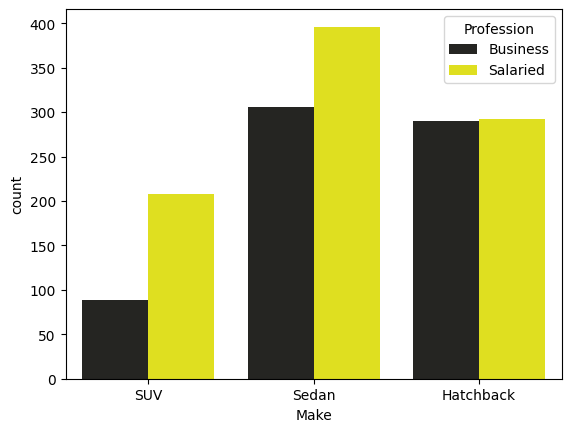

In [46]:
sns.countplot(x='Make', hue='Profession', data=data, palette='dark:yellow')
plt.show()

Business people have purcashed close to 100 SUV, however, Salaried people have purchased 200 SUV's.

Business people have purcashed close to 300 Sedan, however, Salaried people have purchased most Sedans at 400.

Business people and Salaried people have purcashed almost the same number of Hatchback cars, 300 cars each!
So, salaried people have purchased most cars compared to business people.


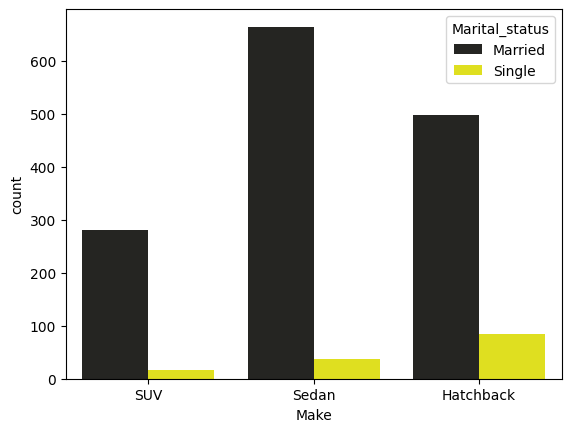

In [47]:
sns.countplot(x='Make', hue='Marital_status', data=data, palette='dark:yellow')
plt.show()

Most cars in all three segments have been purchased by Married people.
Married people have purcahsed the most Sedans around 700.

The least cars that are purcahsed is SUV and is purcahsed by single people.

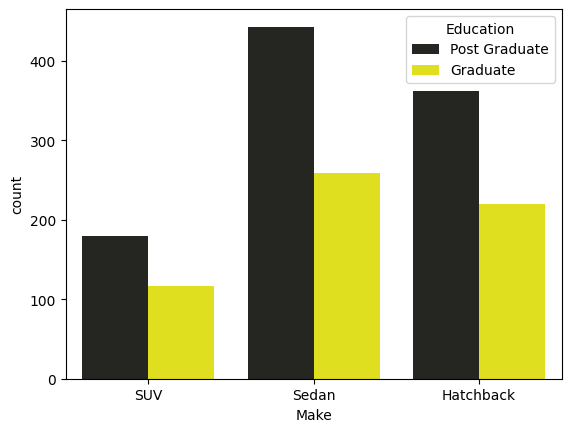

In [48]:
sns.countplot(x='Make', hue='Education', data=data, palette='dark:yellow')
plt.show()

Post-graduates have purchased more cars with respect to Graduates.
Post-graduates perfer Sedan over Hatchback adb SUV.

The highest number of cars purchased by Post-Graduates is Sedan at 450.
The least number of cars is purchased by Graduates, around 100

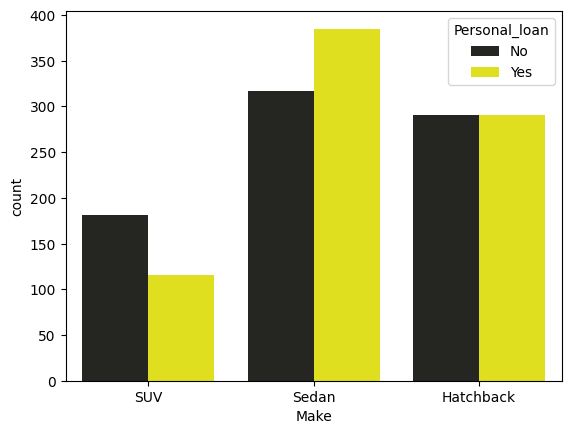

In [49]:
sns.countplot(x='Make', hue='Personal_loan', data=data, palette='dark:yellow')
plt.show()

There are around 400 people who have taken personal loans to buy Sedan cars.

Around 300 people have taken personal loans to buy Hatchback cars.

Only 110 people took personal loan to purcahse SUV

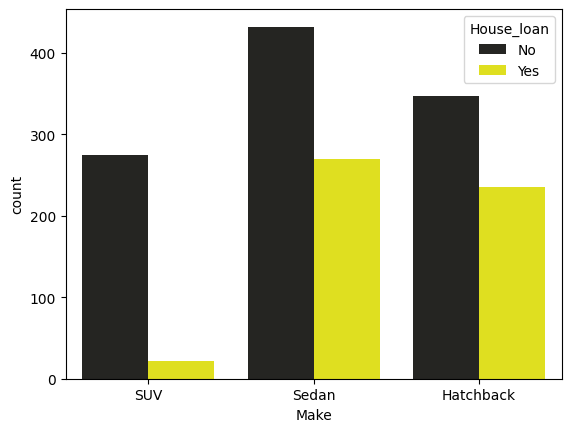

In [50]:
sns.countplot(x='Make', hue='House_loan', data=data, palette='dark:yellow')
plt.show()

People without house loans have purchased most cars, Sedan being the highest, followed by Hatchback and then SUV.

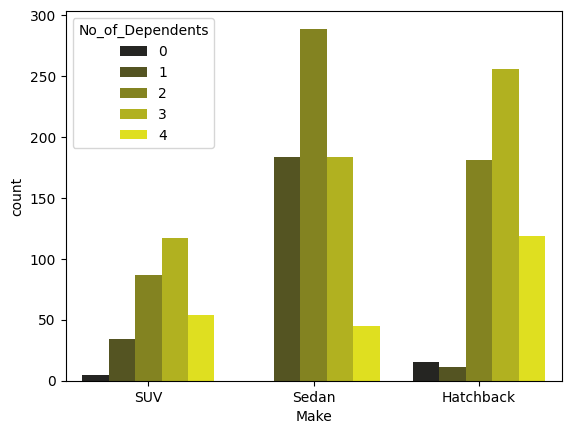

In [51]:
sns.countplot(x='Make', hue='No_of_Dependents', data=data, palette='dark:yellow')
plt.show()

People with No dependants have not purchased Sedan cars.

Around 300 people  who have 2 dependents have purchased Sedan cars.

People with 2 and 3 dependents have purchased most cars, in all 3 segments.

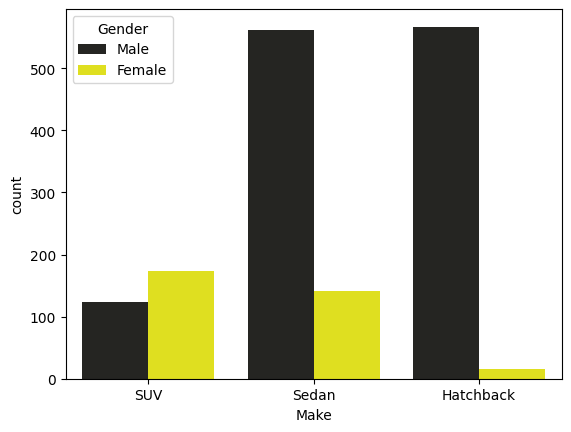

In [52]:
sns.countplot(x='Make', hue='Gender', data=data, palette='dark:yellow')
plt.show()

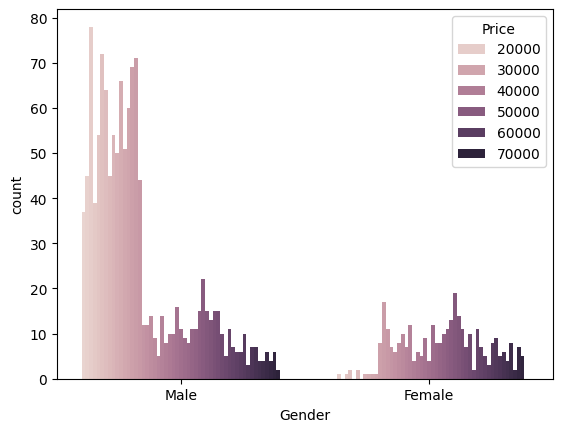

In [53]:
sns.countplot(x='Gender', hue='Price', data=data)
plt.show()

Almost 600 Sedans and 600 Hatchbacks have been purchased by Males.

Females have purchased mre SUV's than males.
Around 170 SUv's have been purchased by feamales.

#### *2.2 Scatterplot Graph & Analysis*

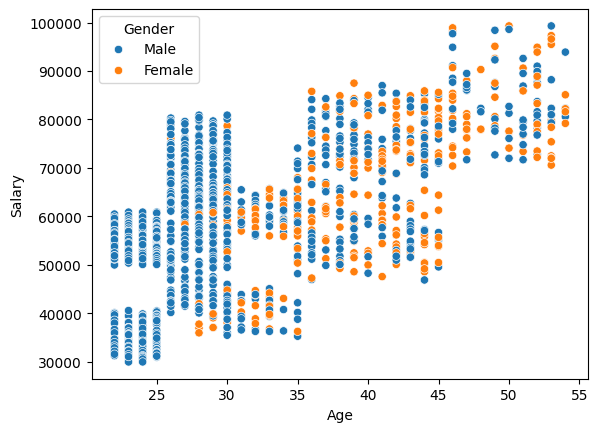

In [54]:
sns.scatterplot(data=data, x='Age', y='Salary', hue = 'Gender')
plt.show()

People in younger age groups have less salary.
Male have started worked before Females and then there seems to eb positive correlation

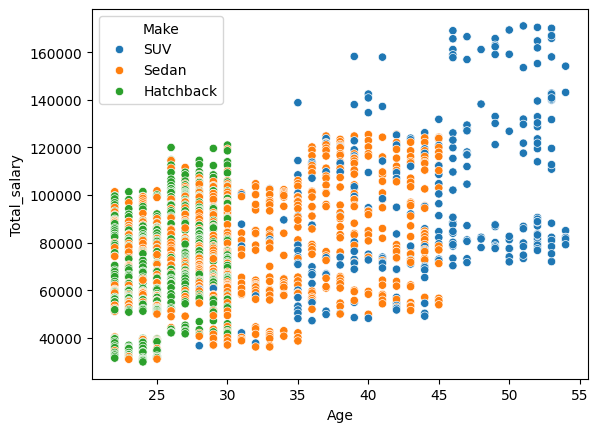

In [55]:
sns.scatterplot(x='Age', y='Total_salary', hue = 'Make', data=data)
plt.show()

People above age group 45 have not purchased Sedan and Hatchbacks.
Most Sedans and Hatchbacks have been purchased by Younger people.

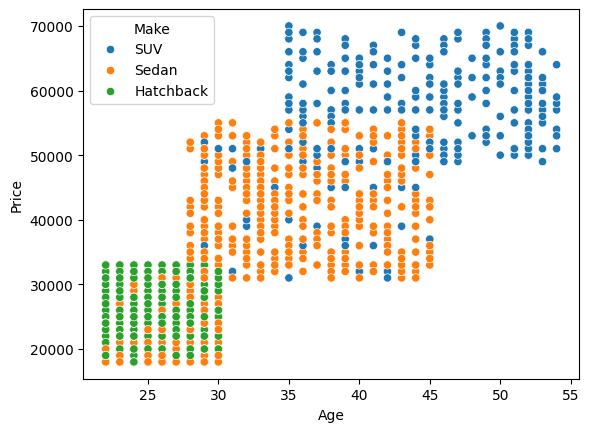

In [56]:
sns.scatterplot(x='Age', y='Price', hue = 'Make', data=data)
plt.show()

Most SUVs have been purchased by people who have salaries above 30000, and most Sedans have been purchased by people who have salaries in the range 30000-55000.

There is a positive correlation between Age, Price and Make.

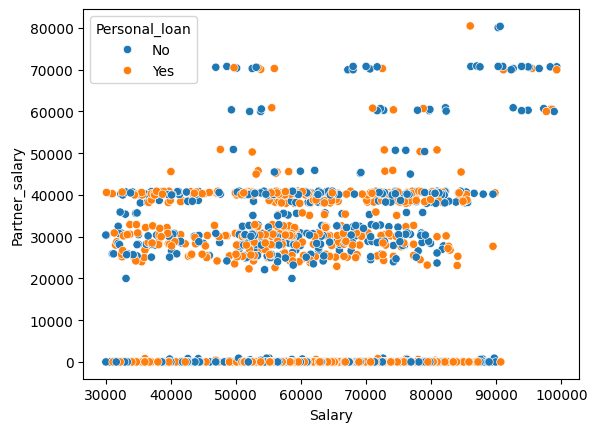

In [57]:
sns.scatterplot(x='Salary', y='Partner_salary', hue = 'Personal_loan', data=data)
plt.show()

Most people whose partners are not working have taken Personal loans.


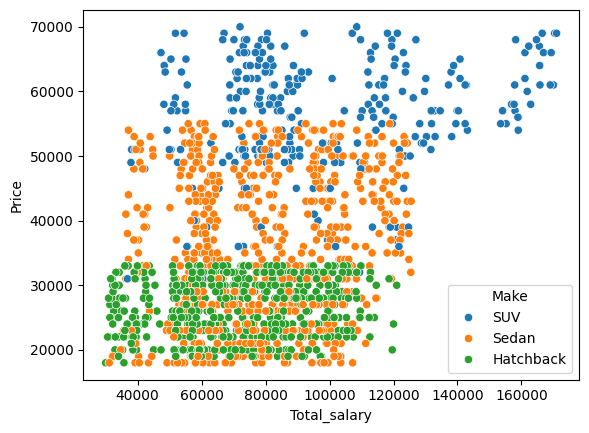

In [58]:
sns.scatterplot(x='Total_salary', y='Price', hue='Make', data=data)
plt.show()

People with less Total salary have purcahsed Sedans and Hatchbacks.
Peolple with most salaries have purchased SUVs

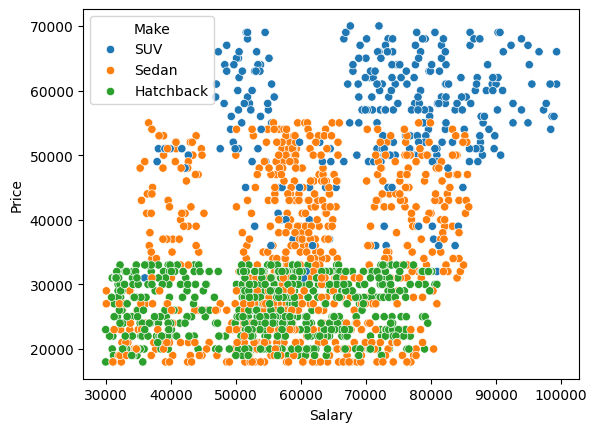

In [59]:
sns.scatterplot(x='Salary', y = 'Price', hue = 'Make', data=data)
plt.show()

People with less salary below 40000 prefer Hatchbacks.
People with salary below 60000 prefer Hatchbacks and Sedan both.
Most people who have salary above 50000 prefer SUV.


### *2.3 Jointplot Graph & Analysis*

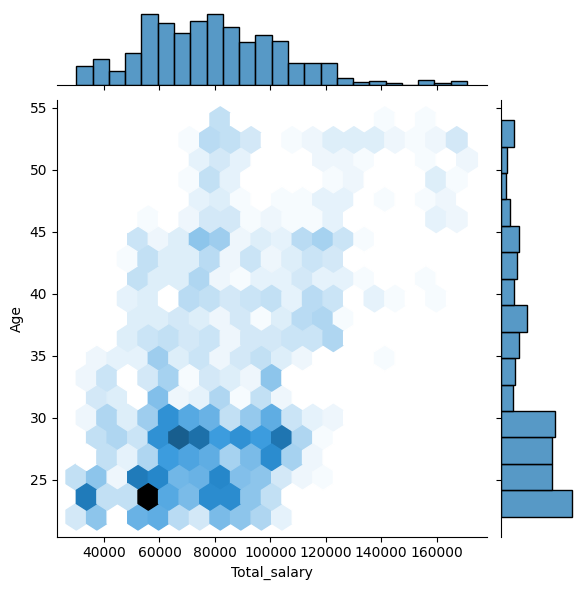

In [60]:
sns.jointplot(x='Total_salary', y='Age', kind = 'hex', data=data)
plt.show()

There are more people in the age group of 22-30.
There are more people who have Total salary in the range of 50000-100000.
There are very less people who have salary above 140000.

---



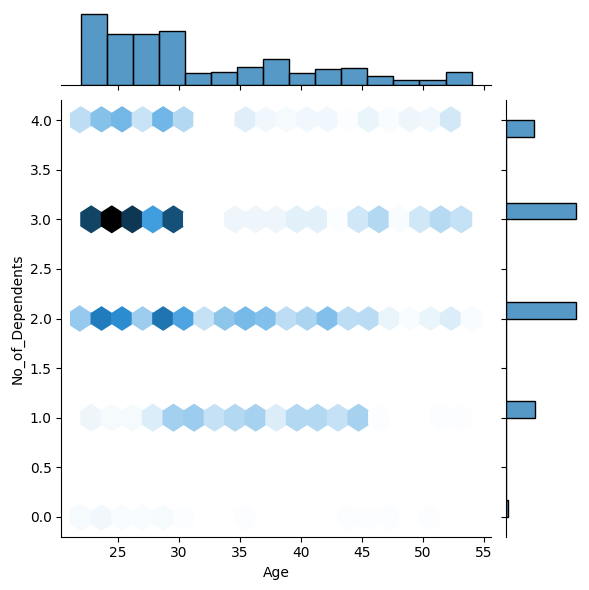

In [61]:
sns.jointplot(x='Age', y='No_of_Dependents', data=data, kind='hex')
plt.show()

Most people have 2 and 4 dependants and people who have 2 adn 4 dependants are equal in number.
Less people have 1 and 4 dependents, people who have 1 and 4 dependents are equal in number.
People in the age group 22-30 have most dependents

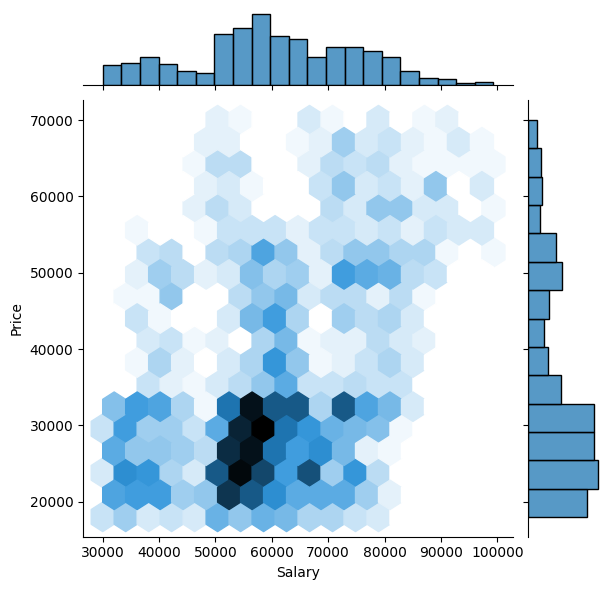

In [62]:
sns.jointplot(x='Salary', y='Price', data=data, kind='hex')
plt.show()

People who have salary between 50000-60000 have purchased cars that have a price range 20000-30000, which means more of Hatchbacks.

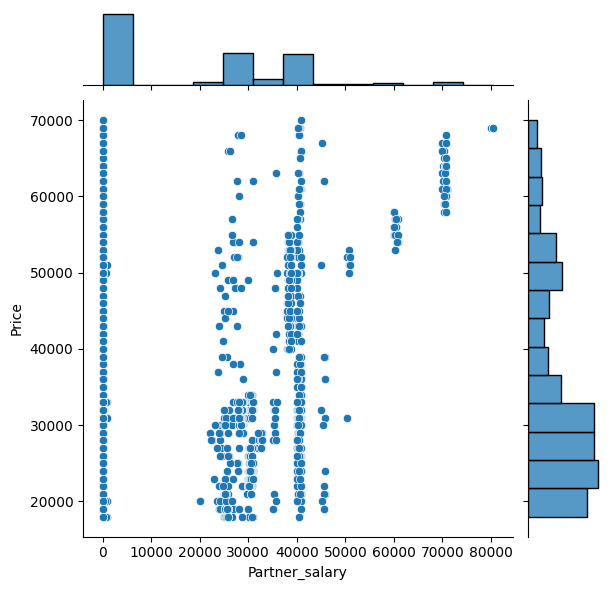

In [63]:
sns.jointplot(x='Partner_salary', y='Price', data=data )
plt.show()

Most number of people are those whose p[artners are not working.
People whose p[artners are earning between 20000-50000 have purchased cars in all three price ranges, but most in price range 20000-30000

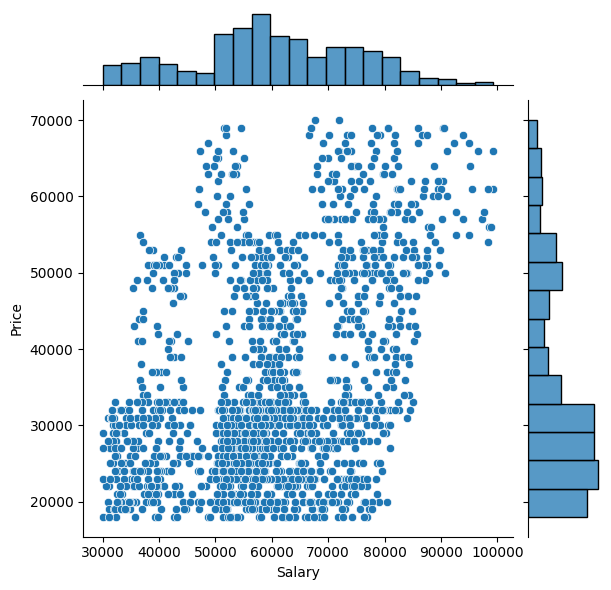

In [64]:
sns.jointplot(x='Salary', y='Price', data=data )
plt.show()

Most cars have been purchased by people whose Salary is between 50000-70000, and the price of the cars preferred the most are in the price range of 20000-30000.

### *2.4 Pairplot Graph & Analysis*

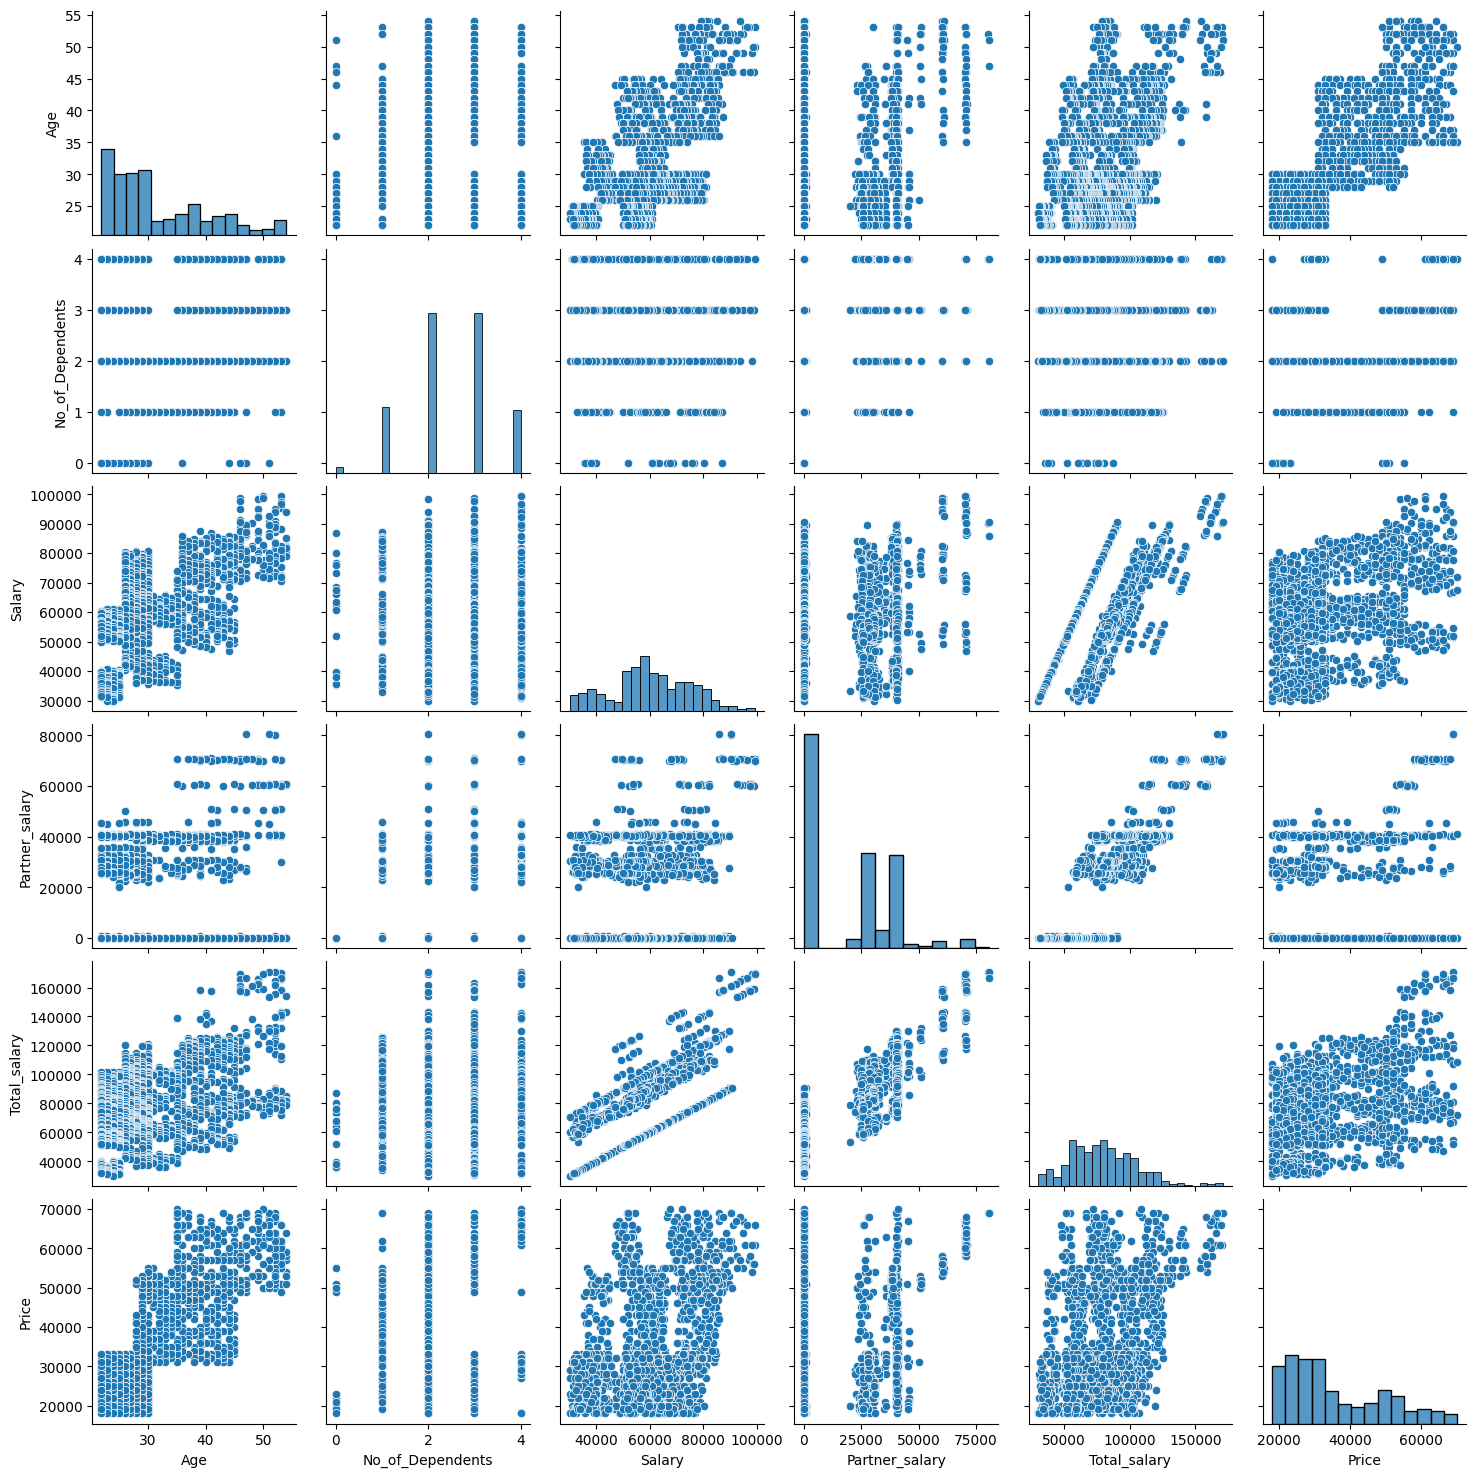

In [65]:
sns.pairplot(data)
plt.show()

The diagonal elements represents the histogram or univariate analysis of Age, No_of_Dependents, Salary, Partner_Salary, Total_Salary and Price.

There is a positive correlation between Age and Salary, Total Salary and Age, Total salary and Salary, Age and Price.

### *2.5 Heatmap Graph & Analysis*

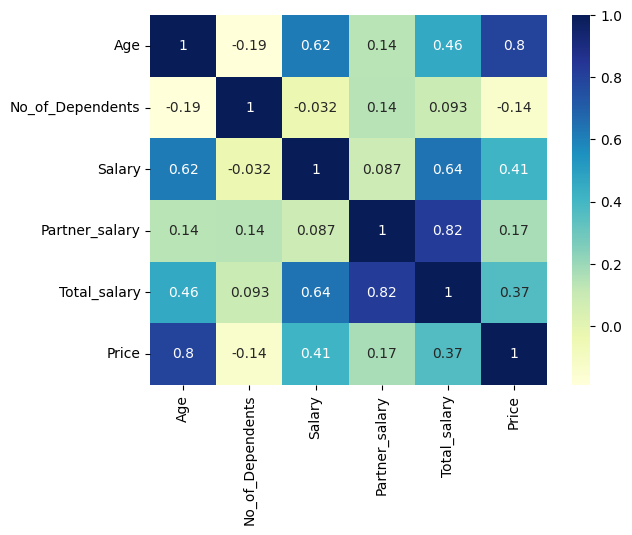

In [66]:
sns.heatmap(data=data[['Age', 'No_of_Dependents','Salary','Partner_salary','Total_salary','Price']].corr(), annot=True, cmap = 'YlGnBu');
plt.show()

The highest correlation is between Total salary and Partner salary, which means the higher the partner salary, the higher the total salary.
Age and Price have a positive correlation.
Salary and No of dependents have a negative correlation which means, the higher the salary the lesser will be the no of dependents.
Price and No of dependents have a negative correlation which means the higher the price of the car, the lesser will be the no of dependents.

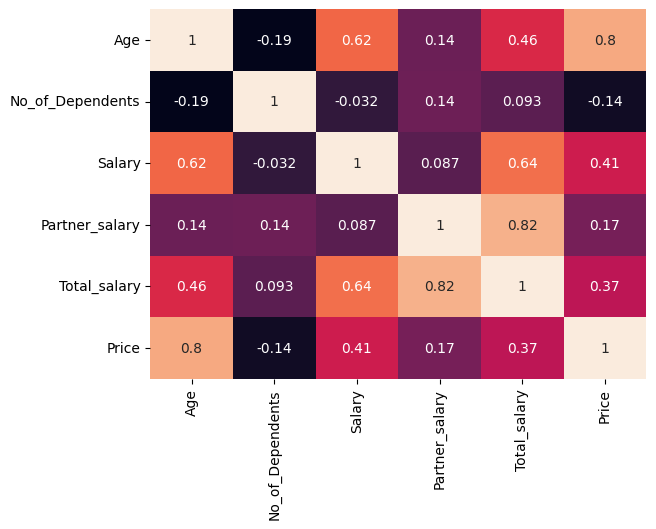

In [67]:
sns.heatmap(data=data[['Age', 'No_of_Dependents','Salary','Partner_salary','Total_salary','Price']].corr(), annot=True, cbar=False);
plt.show()

### *2.6 Countplot Graph & Analysis*

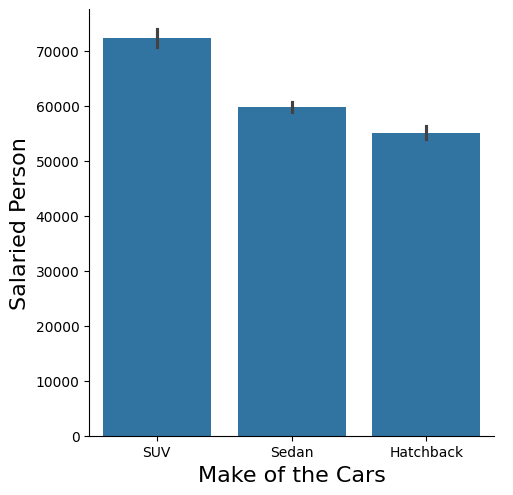

In [72]:
sns.catplot(x='Make', y ='Salary', kind = "bar", data=data)
plt.xlabel('Make of the Cars',fontsize = 16)
plt.ylabel('Salaried Person',fontsize = 16)
plt.show()

The mean of a salaried person buying an SUV is more than Sedan and Hatchback, which means the likelihood of a salaried person buying a Sedan is more than Hatchback but less than SUV

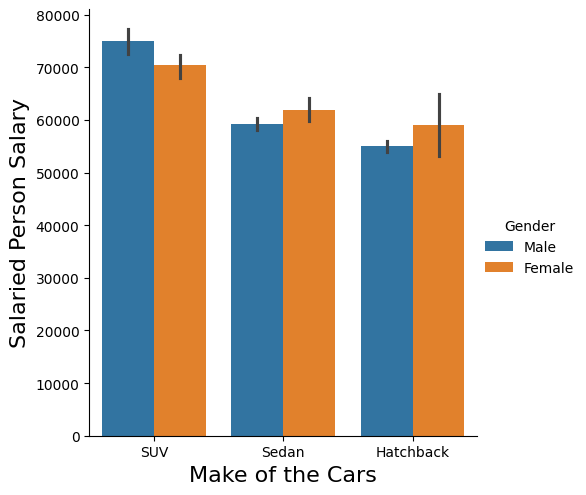

In [73]:
sns.catplot(x='Make', y ='Salary', hue = 'Gender', kind = "bar", data=data)
plt.xlabel('Make of the Cars',fontsize = 16)
plt.ylabel('Salaried Person Salary',fontsize = 16)
plt.show()

The mean of Male buying a SUV is more than Sedan and Hatchback which means on an average Male prefer SUV over a Sedan

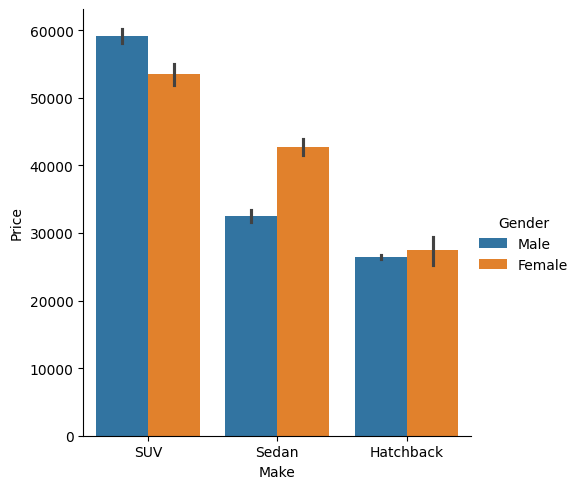

In [74]:
sns.catplot(x='Make', y='Price', hue = 'Gender', kind = "bar", data=data)
plt.show()

The mean of Male buying a SUV is more than Sedan and Hatchback which means on an average Male prefer SUV over a Sedan.

In [76]:
# Replace 'No' and 'Yes' with 0 and 1 respectively
data['Personal_loan'] = data['Personal_loan'].replace({'No': 0, 'Yes': 1})

# Now convert the column to integer type
data['Personal_loan'] = data['Personal_loan'].astype(int)


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1581 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   int64 
 6   Personal_loan     1581 non-null   int64 
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   int64 
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(7), object(7)
memory usage: 173.0+ KB


In [78]:
loan_counts = data['Personal_loan'].value_counts()
loan_counts

Personal_loan
1    792
0    789
Name: count, dtype: int64

In [79]:
loan_data = data[data['Personal_loan'] == 1]

In [80]:
total_spent = loan_data['Price'].sum()
total_spent

27290000

# **Answers to key questions**

**1. Do men tend to prefer SUVs more compared to women?**

*Answer: No, Females tend to preferen SUVs compared to men.*

**2. What is the likelihood of a salaried person buying a Sedan?**

*Answer:The mean of a salaried person buying an SUV is more than Sedan and Hatchback, which means the likelihood of a salaried person buying a Sedan is more than Hatchback but less than SUV.*


**3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?**
*Answer: The mean of Male buying a SUV is more than Sedan and Hatchback which means on an average Male prefer SUV over a Sedan.*

**4.How does the the amount spent on purchasing automobiles vary by gender?**

*Answer: On an average Females spend more amount on Automobile. As per the data on an average Female spends over 45000 whereas Male spends around 30000 on automobiles.*

**5. How much money was spent on purchasing automobiles by individuals who took a personal loan?**
*Answer: The total amount spent on purchasing automobiles by individuals who took personal loan is 27290000*

**6. How does having a working partner influence the purchase of higher-priced cars?**